## AccelerateAI - Time Series Analysis and Forecasting

### Vector Auto Regression Example

In [186]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### VECTOR AUTO REGRESSION EQUATION:


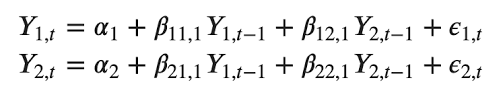

In [187]:
#Import macro data
#filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
#macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
data = sm.datasets.macrodata.load_pandas()
macro_data = data.data.dropna()
macro_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


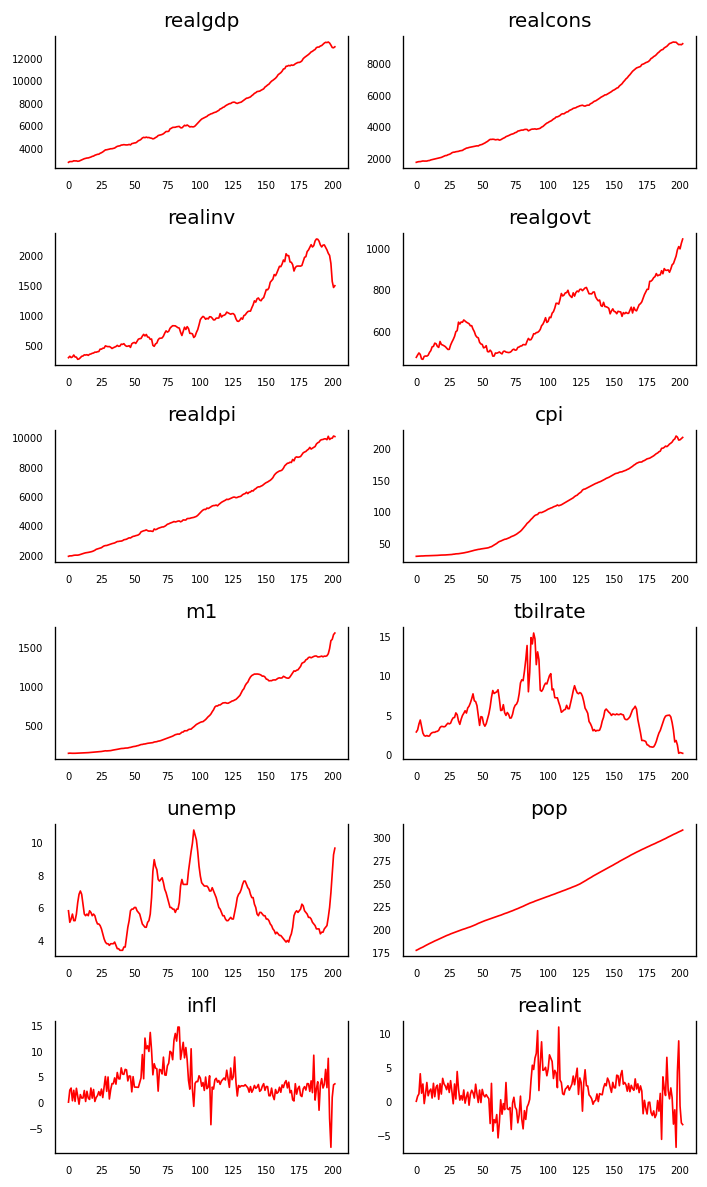

In [188]:
# Check the data trend
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(6,10))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i+2]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i+2])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [189]:
#Stationarity Check

ad_fuller_result_1 = adfuller(macro_data['realgdp'])#.diff()[1:])

print('Stationarity check: realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('---------------------')

ad_fuller_result_2 = adfuller(macro_data['realcons'])#.diff()[1:])

print('Stationarity check: realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Stationarity check: realgdp
ADF Statistic: 1.7504627967647153
p-value: 0.9982455372335032
---------------------
Stationarity check: realcons
ADF Statistic: 1.5499123380509607
p-value: 0.9976992503412904


In [190]:
print('realgdp Granger cause realcons?')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['realcons', 'realgdp']], 4)

print('realcon Granger cause realgdp?')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['realgdp', 'realcons']], 4)

realgdp Granger cause realcons?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6290  , p=0.0108  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=6.7289  , p=0.0095  , df=1
likelihood ratio test: chi2=6.6193  , p=0.0101  , df=1
parameter F test:         F=6.6290  , p=0.0108  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5221  , p=0.0829  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=5.1729  , p=0.0753  , df=2
likelihood ratio test: chi2=5.1074  , p=0.0778  , df=2
parameter F test:         F=2.5221  , p=0.0829  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6062  , p=0.6117  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=1.8845  , p=0.5967  , df=3
likelihood ratio test: chi2=1.8756  , p=0.5986  , df=3
parameter F test:         F=0.6062  , p=0.6117  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero)

In [191]:
# Get columns for VAR model
macro_data = macro_data[['realcons','realgdp']]
print(macro_data.shape)

(203, 2)


In [196]:
#Split into test and train
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [197]:
print(test_df.shape)

(12, 2)


In [198]:
# Fit a VAR model with 1st difference 
model = VAR(train_df.diff()[1:])

In [212]:
# Identify model order 
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.37       14.41   1.742e+06       14.38
1        14.09       14.19   1.310e+06       14.13
2        14.03       14.20   1.233e+06       14.10
3       13.93*      14.18*  1.122e+06*      14.03*
4        13.97       14.29   1.165e+06       14.10
5        13.98       14.37   1.175e+06       14.14
6        14.01       14.48   1.220e+06       14.20
7        14.01       14.55   1.221e+06       14.23
8        14.03       14.63   1.240e+06       14.27
9        14.05       14.73   1.272e+06       14.33
10       14.08       14.83   1.306e+06       14.38
--------------------------------------------------


In [213]:
# Retrain a VAR model (p=3, q=0) with stationarity
var_model = VARMAX(train_df, order=(3,0), enforce_stationarity= True)   
fitted_model = var_model.fit()
print(fitted_model.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realcons', 'realgdp']   No. Observations:                  191
Model:                              VAR(3)   Log Likelihood              -80014.078
                               + intercept   AIC                         160062.156
Date:                     Sat, 12 Nov 2022   BIC                         160117.445
Time:                             11:54:58   HQIC                        160084.550
Sample:                                  0                                         
                                     - 191                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):         173.01, 182.49   Jarque-Bera (JB):           6.49, 5.84
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.04, 0.05
Heteroskedasticity (H):         1.19, 0.99   Skew:                       0.4

In [214]:
# Forecast for next 12 quarters
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [215]:
predictions.columns=['realcons_f','realgdp_f']
predictions.tail()

,realcons_f,realgdp_f
198,9063.068317,13043.498228
199,9064.300705,12938.767171
200,9022.766718,13101.284626
201,9917.883514,14082.820777
202,8940.600469,14217.225966


In [216]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

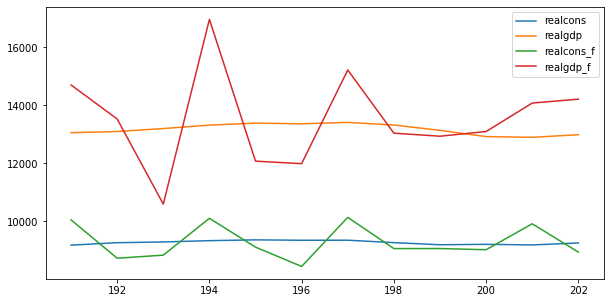

In [217]:
test_vs_pred.plot(figsize=(10,5))

In [218]:
# Check the model performance

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statistics import mean

rmse_ulc=mean_absolute_percentage_error(test_vs_pred['realcons'], test_vs_pred['realcons_f'])
print('Prediction for Cons: MAPE is :{:.3f}'.format(rmse_ulc))

rmse_rgnp=mean_absolute_percentage_error(test_vs_pred['realgdp'],test_vs_pred['realgdp_f'])
print('Prediction for RGDP: MAPE is :{:.3f}'.format(rmse_rgnp))

Prediction for Cons: MAPE is :0.055
Prediction for RGDP: MAPE is :0.100


***